### Installing Required Packages ###

In [2]:
!pip install pandas scikit-learn nltk spacy matplotlib seaborn



In [3]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 217.9 kB/s eta 0:00:59
     --------------------------------------- 0.0/12.8 MB 186.2 kB/s eta 0:01:09
     --------------------------------------- 0.0/12.8 MB 186.2 kB/s eta 0:01:09
     --------------------------------------- 0.1/12.8 MB 252.2 kB/s eta 0:00:51
     --------------------------------------- 0.1/12.8 MB 409.6 kB/s eta 0:00:31
     --------------------------------------- 0.2/12.8 MB 517.2 kB/s eta 0:00:25
      -------------------------------------- 0.3/12.8 MB 714.4 kB/s eta 0:00:18
      -------------------------------------- 0.3/12.8 MB 791.9 kB/s eta 0:00:16
     - ------------------------------------- 0.4/12.8 MB 970.6 kB/s eta 0:00:13
     - -------------------------------------- 0.5/12.8 MB 1.0 MB/s eta 0:00:13
     - -------------------------------------- 0.6/12.8 MB

### Import Libraries ###

In [6]:
import pandas as pd
import string
import nltk
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load and Preprocess Resume Data

In [7]:
df = pd.read_csv("C:/Users/Hp/Downloads/Resume.csv.zip")  
df = df[["Resume_str", "Category"]]  

def clean_text(text):
    doc = nlp(text.lower())
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha and not token.is_stop and token.text not in stop_words
    ]
    return " ".join(tokens)

df["Cleaned"] = df["Resume_str"].apply(clean_text)


In [8]:
df_sample = df.head(5).copy()
df_sample["Cleaned"] = df_sample["Resume_str"].apply(clean_text)
print(df_sample[["Resume_str", "Cleaned"]])


                                          Resume_str  \
0           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1           HR SPECIALIST, US HR OPERATIONS      ...   
2           HR DIRECTOR       Summary      Over 2...   
3           HR SPECIALIST       Summary    Dedica...   
4           HR MANAGER         Skill Highlights  ...   

                                             Cleaned  
0  hr administrator marketing associate hr admini...  
1  hr specialist hr operation summary versatile m...  
2  hr director summary year experience recruiting...  
3  hr specialist summary dedicate driven dynamic ...  
4  hr manager skill highlight hr skill hr departm...  


In [9]:
print(df[["Resume_str", "Cleaned"]].head())


                                          Resume_str  \
0           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1           HR SPECIALIST, US HR OPERATIONS      ...   
2           HR DIRECTOR       Summary      Over 2...   
3           HR SPECIALIST       Summary    Dedica...   
4           HR MANAGER         Skill Highlights  ...   

                                             Cleaned  
0  hr administrator marketing associate hr admini...  
1  hr specialist hr operation summary versatile m...  
2  hr director summary year experience recruiting...  
3  hr specialist summary dedicate driven dynamic ...  
4  hr manager skill highlight hr skill hr departm...  


In [16]:
print (df.shape)

(2484, 3)


### TF-IDF and Split Data

In [12]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df["Cleaned"])
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train all 3 Models and Evaluate

In [14]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (LinearSVC)": LinearSVC()
}

results = {}

for name, model in models.items():
    print(f"\nTraining: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {"accuracy": acc, "confusion_matrix": cm}

    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))



Training: Naive Bayes
Accuracy: 0.5634
Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.76      0.90      0.83        29
              ADVOCATE       0.53      0.33      0.41        30
           AGRICULTURE       1.00      0.12      0.22         8
               APPAREL       0.86      0.30      0.44        20
                  ARTS       0.20      0.06      0.09        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.67      0.76      0.71        21
               BANKING       0.70      0.61      0.65        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.52      0.63      0.57        27
                  CHEF       0.77      0.71      0.74        24
          CONSTRUCTION       0.84      0.62      0.71        34
            CONSULTANT       0.33      0.05      0.09        20
              DESIGNER       0.82      

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6459
Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.81      0.86      0.83        29
              ADVOCATE       0.55      0.60      0.57        30
           AGRICULTURE       1.00      0.12      0.22         8
               APPAREL       0.56      0.45      0.50        20
                  ARTS       0.13      0.11      0.12        18
            AUTOMOBILE       1.00      0.17      0.29         6
              AVIATION       0.82      0.86      0.84        21
               BANKING       0.77      0.74      0.76        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.78      0.52      0.62        27
                  CHEF       0.85      0.71      0.77        24
          CONSTRUCTION       0.90      0.76      0.83        34
            CONSULTANT       0.46      0.30      0.36        20
              DESIGNER       0.75      0.79      0.77        1

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6801
Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.79      0.93      0.86        29
              ADVOCATE       0.69      0.73      0.71        30
           AGRICULTURE       0.50      0.12      0.20         8
               APPAREL       0.58      0.55      0.56        20
                  ARTS       0.43      0.17      0.24        18
            AUTOMOBILE       0.50      0.33      0.40         6
              AVIATION       0.72      0.86      0.78        21
               BANKING       0.81      0.74      0.77        23
                   BPO       0.33      0.50      0.40         2
  BUSINESS-DEVELOPMENT       0.76      0.48      0.59        27
                  CHEF       0.85      0.71      0.77        24
          CONSTRUCTION       0.88      0.82      0.85        34
            CONSULTANT       0.50      0.25      0.33        20
              DESIGNER       0.76      0.84      0.80        1

In [13]:
print(df.shape)
print(X_train.shape, X_test.shape)


(2484, 3)
(1987, 3000) (497, 3000)


### Visualize Confusion Matrices

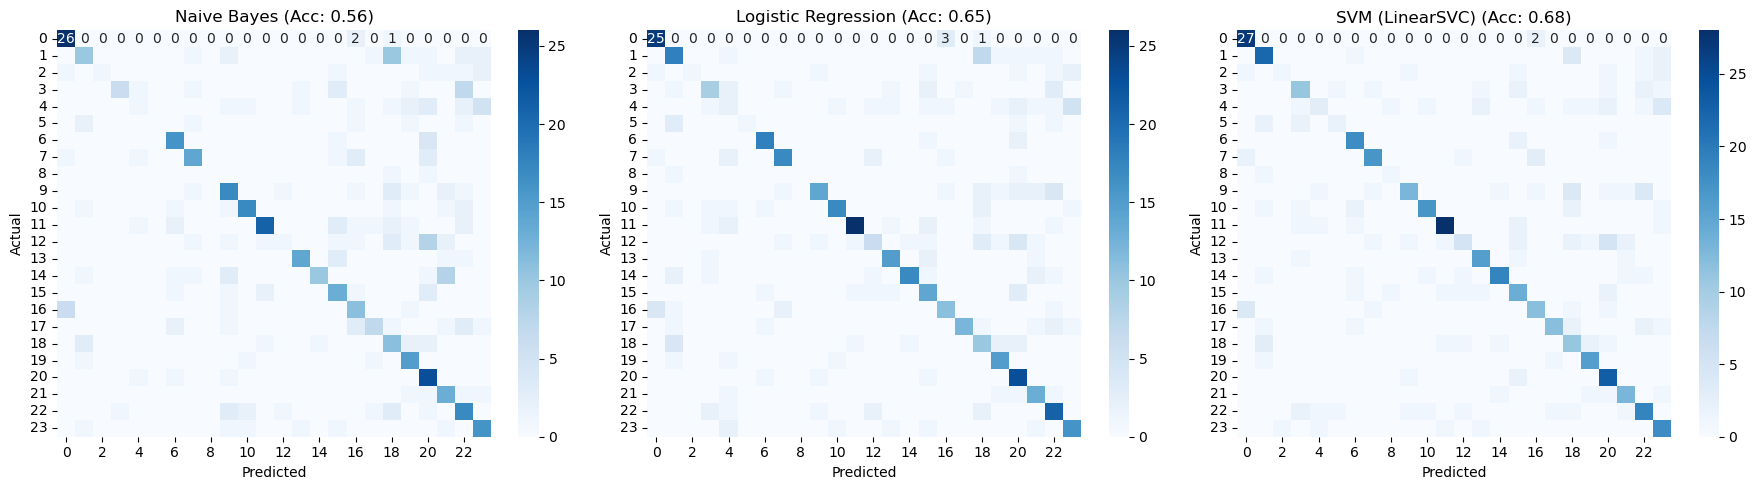

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, result) in enumerate(results.items()):
    sns.heatmap(result["confusion_matrix"], annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} (Acc: {result['accuracy']:.2f})")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()


### Save Model and Vectorizer

In [21]:
import pickle

# Choose your best model (e.g., Naive Bayes here)
best_model = models["Naive Bayes"]

# Save model and vectorizer
with open("resume_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)
